In [1]:
%matplotlib inline
import numpy as np
import src.io as io
import src.components as cmpnt

/Users/fpoitevi/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/fpoitevi/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


`filename` is the input PDB file containing the structural ensemble, and `jobname` is the basename of all output files from the analysis.

In [2]:
filename = 'data/rnapol2_ensemble.pdb' 
jobname  = 'rnapol2/ensemble_' 

Load dataset and filter out eventual outliers (any point above ic_thresh - not used here)

In [3]:
traj, ids = io.load_dataset(filename)
traj_new,ids_new = cmpnt.filter(traj,ids,title=jobname)

Perform hierarchical clustering in component space, using the IC distance

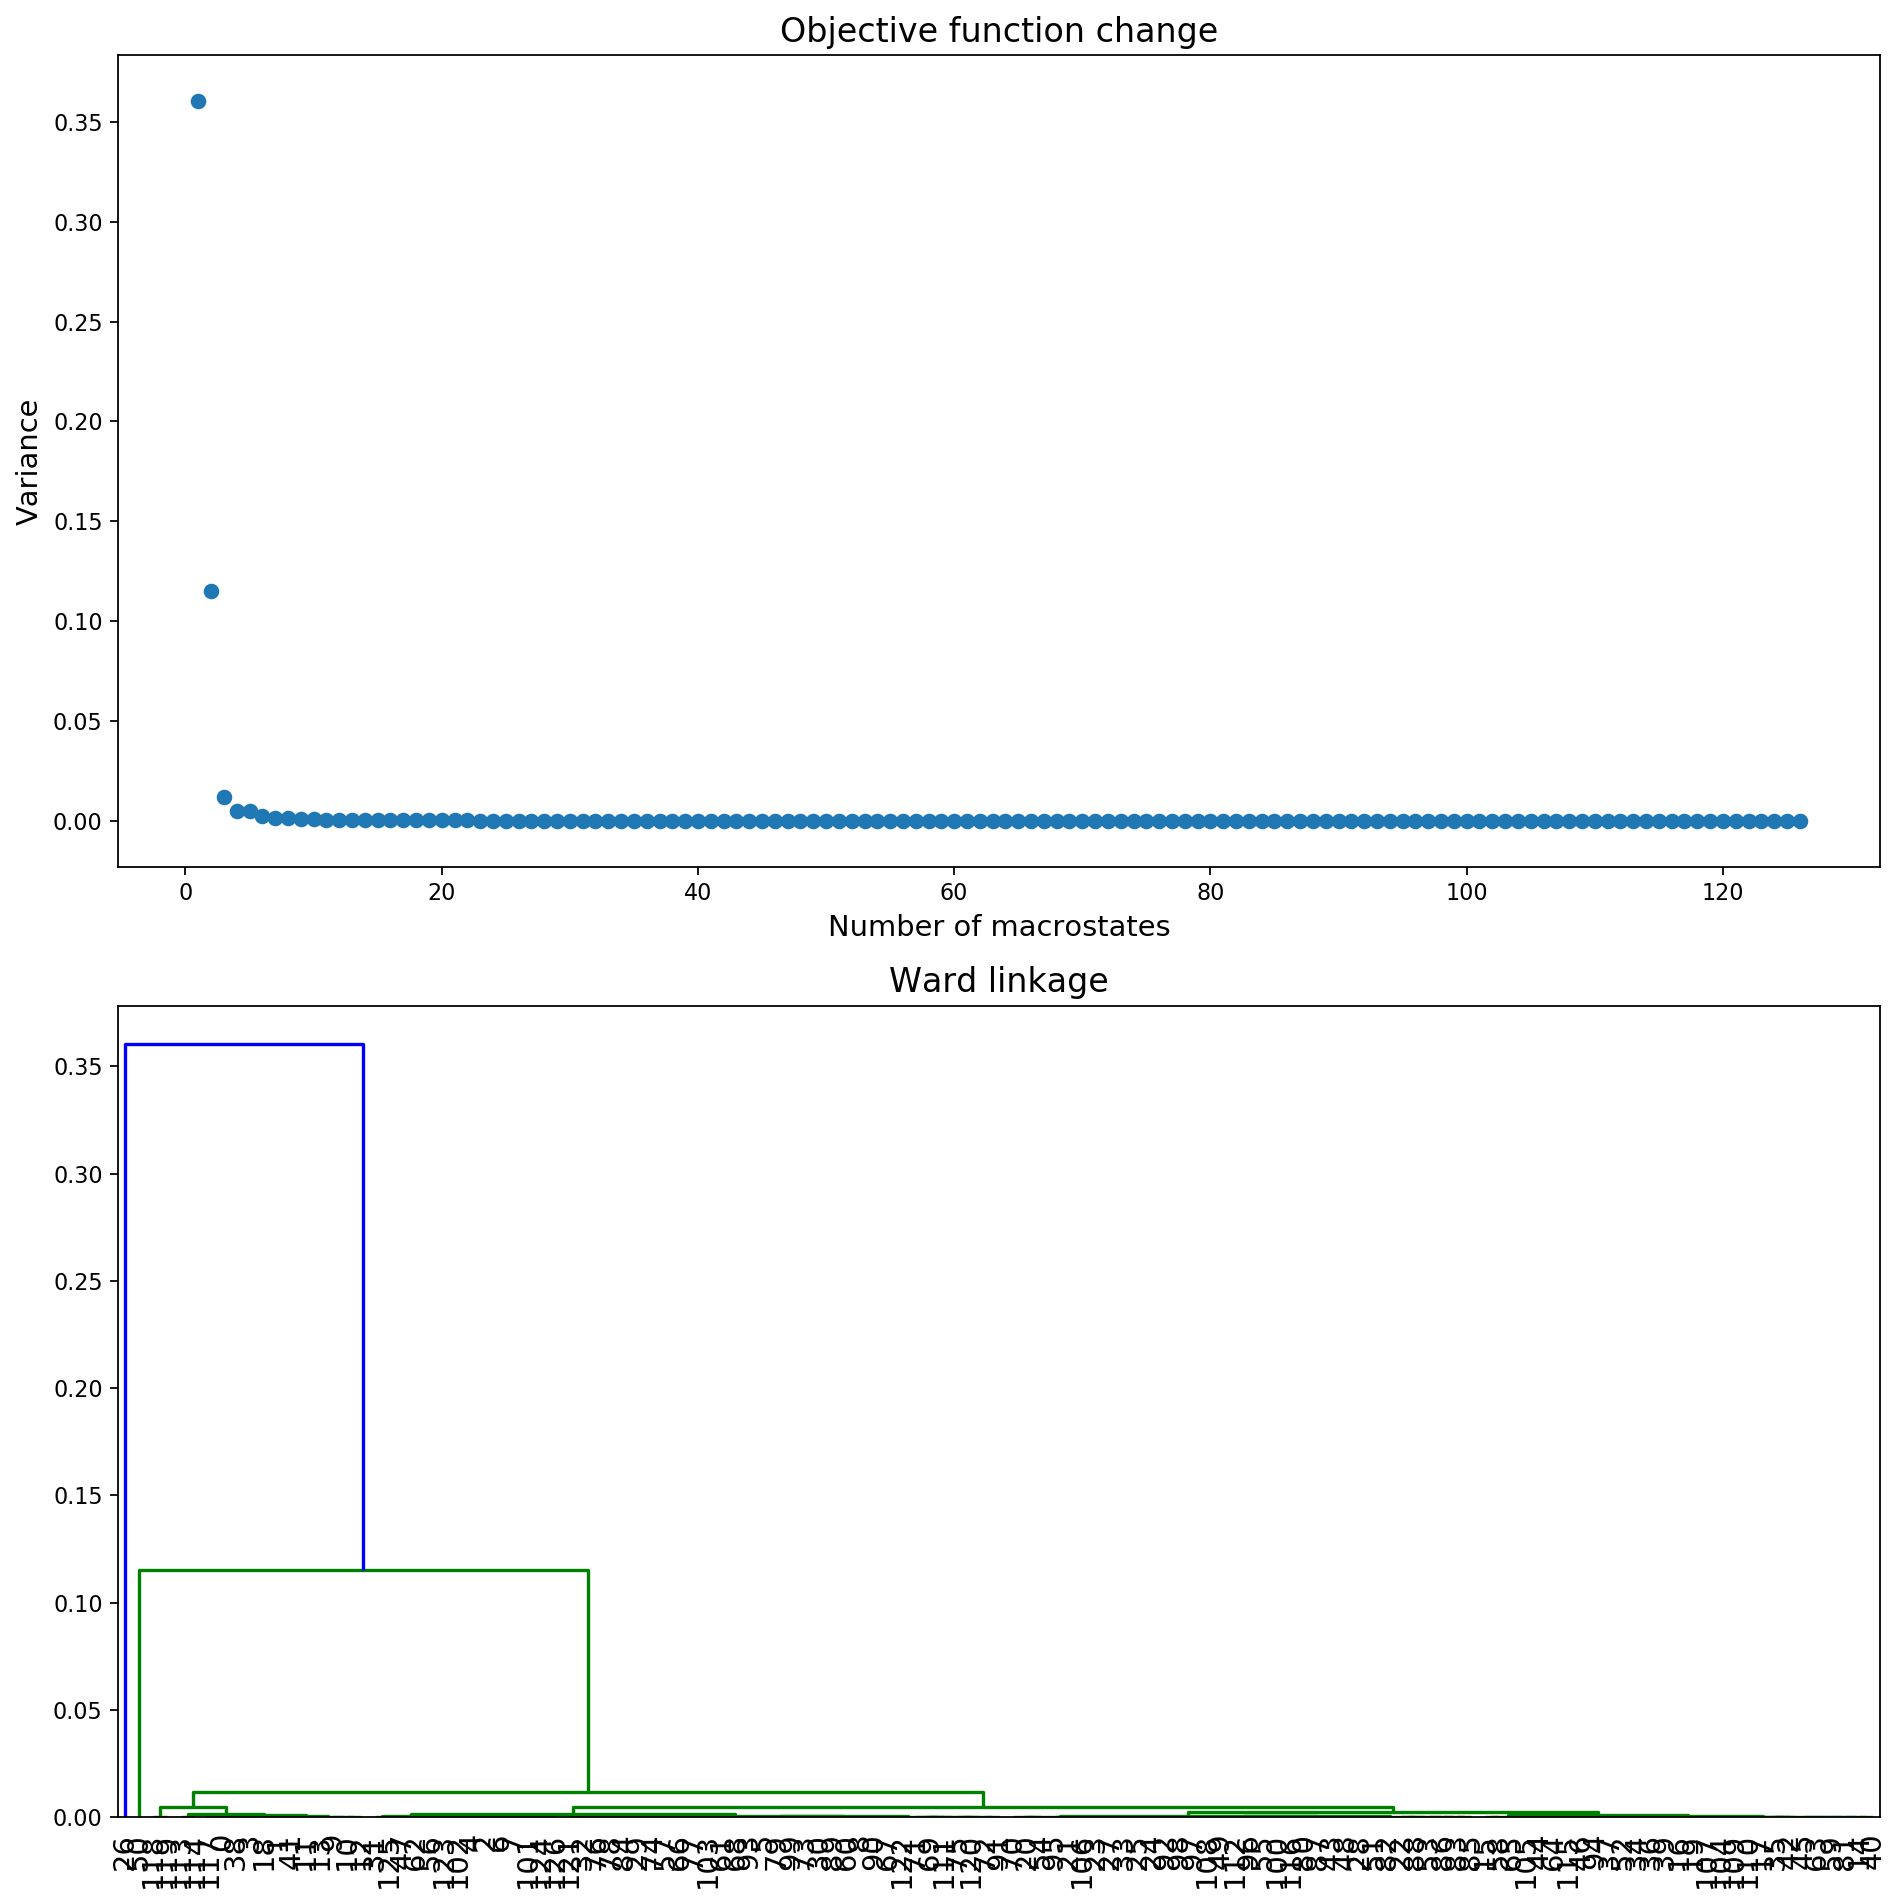

In [4]:
clusters = cmpnt.cluster(traj_new,ids_new,title=jobname)

Based on the result above, we decide how many clusters to save, and write them to output.

> rnapol2/ensemble_cluster_1
wrote  rnapol2/ensemble_cluster_1.pdb  :  ['1i3q+00.cif' '1i50+00.cif' '1i6h+00.cif' '1k83+00.cif' '1nik+00.cif'
 '1r5u+00.cif' '1r9s+00.cif' '1r9t+00.cif' '1sfo+00.cif' '1twa+00.cif'
 '1twc+00.cif' '1twf+02.cif' '1twg+00.cif' '1twh+00.cif' '1wcm+00.cif'
 '1y1v+00.cif' '1y1w+00.cif' '1y77+00.cif' '2b63+00.cif' '2b8k+00.cif'
 '2e2h+00.cif' '2e2i+00.cif' '2e2j+00.cif' '2ja5+00.cif' '2ja6+00.cif'
 '2ja7+01.cif' '2ja8+00.cif' '2nvq+00.cif' '2nvt+00.cif' '2nvx+00.cif'
 '2nvy+00.cif' '2nvz+00.cif' '2r7z+00.cif' '2r92+00.cif' '2r93+00.cif'
 '2vum+00.cif' '2yu9+00.cif' '3cqz+00.cif' '3fki+00.cif' '3gtg+00.cif'
 '3gtj+00.cif' '3gtk+00.cif' '3gtl+00.cif' '3gtm+00.cif' '3gto+00.cif'
 '3gtp+00.cif' '3gtq+00.cif' '3h3v+00.cif' '3hou+01.cif' '3hov+00.cif'
 '3how+00.cif' '3hox+00.cif' '3hoy+00.cif' '3hoz+00.cif' '3i4m+00.cif'
 '3i4n+00.cif' '3j0k+00.cif' '3k1f+00.cif' '3k7a+00.cif' '3m3y+00.cif'
 '3m4o+00.cif' '3po2+00.cif' '3po3+00.cif' '3qt1+00.cif' '3rzd+00.cif'
 '3rzo

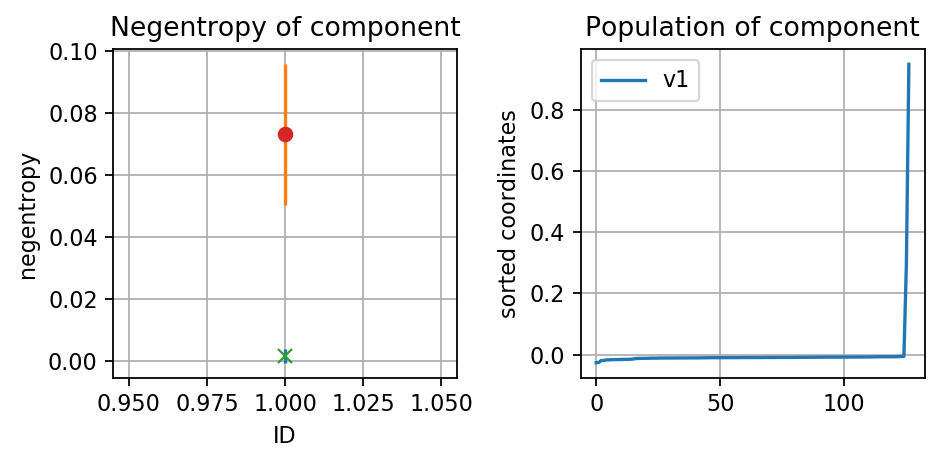

projection of data in component space


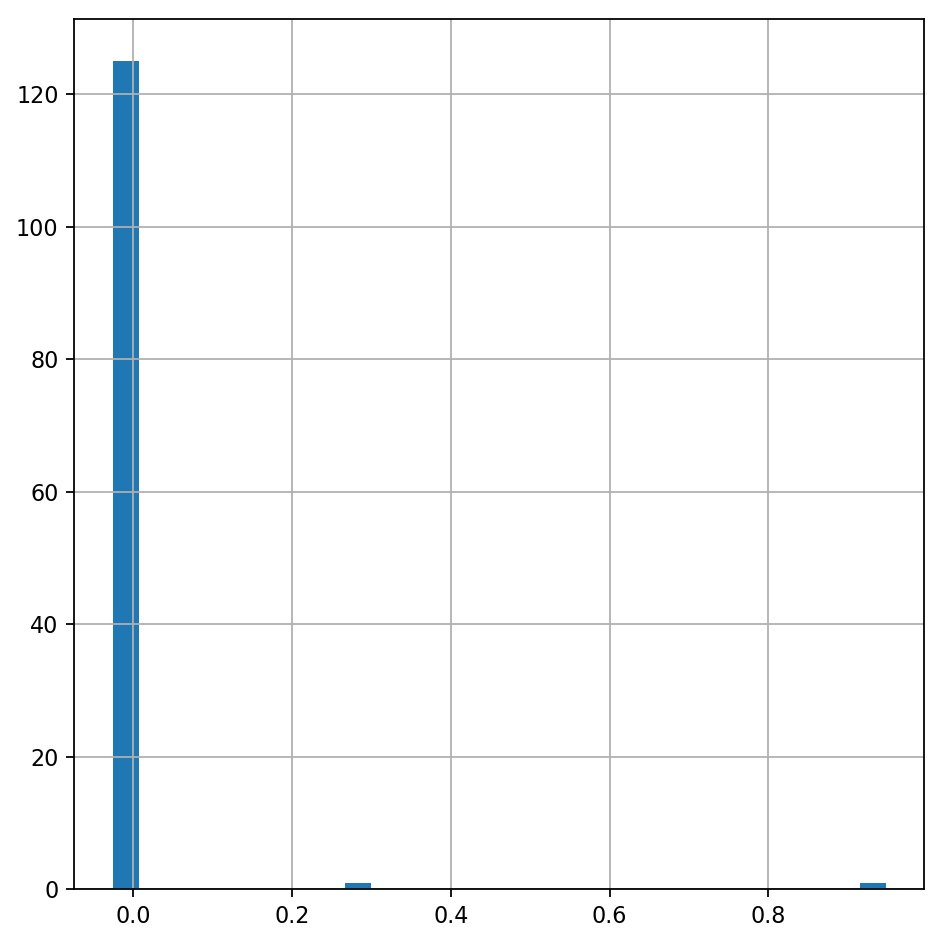

wrote  rnapol2/ensemble__oscillatory_IC1.pdb
wrote  rnapol2/ensemble__sorted_IC1.pdb


In [5]:
n_clusters=3
cmpnt.cluster_split(traj_new,ids_new,clusters,n_clusters,title=jobname)
assignment = cmpnt.get_assignment(clusters,n_clusters)
v, m, x = cmpnt.analyses(traj_new,ids_new,c=assignment,title=jobname)
cmpnt.save_ICmode(traj_new,ids_new,v,m,x,nICs=np.arange(x.shape[1]),mode='oscillatory',keyword=jobname,verbose='full')
cmpnt.save_ICmode(traj_new,ids_new,v,m,x,nICs=np.arange(x.shape[1]),mode='sorted',keyword=jobname,verbose='full')